<a href="https://colab.research.google.com/github/alberttg-ops/machine-learning-lineary-regression-testing/blob/main/final_presentation_ready_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Salary Prediction using Linary Regression

----
----

The dataset is from kagas.
The goal of the training shall be to predict the average salary.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/jobs-dataset-from-glassdoor")

print("Path to dataset files:", path)

100%|██████████| 3.23M/3.23M [00:00<00:00, 126MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/thedevastator/jobs-dataset-from-glassdoor/versions/2


In [2]:
import pandas as pd

salary_df = pd.read_csv(path + '/salary_data_cleaned.csv')

In [3]:
print("Column Names:")
for col in salary_df.columns:
    print(f"- {col}")


Column Names:
- Job Title
- Salary Estimate
- Job Description
- Rating
- Company Name
- Location
- Headquarters
- Size
- Founded
- Type of ownership
- Industry
- Sector
- Revenue
- Competitors
- hourly
- employer_provided
- min_salary
- max_salary
- avg_salary
- company_txt
- job_state
- same_state
- age
- python_yn
- R_yn
- spark
- aws
- excel


Since i am going to train the model on avg_salary, removign contents that has no effect on the required outcome.

In [4]:
drop_cols = [
    "Job Title",
    "Salary Estimate",
    "Job Description",
    "Company Name",
    "company_txt",
    "Competitors",
    "min_salary",
    "max_salary"
]

salary_df = salary_df.drop(drop_cols, axis=1)

In [5]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             742 non-null    float64
 1   Location           742 non-null    object 
 2   Headquarters       742 non-null    object 
 3   Size               742 non-null    object 
 4   Founded            742 non-null    int64  
 5   Type of ownership  742 non-null    object 
 6   Industry           742 non-null    object 
 7   Sector             742 non-null    object 
 8   Revenue            742 non-null    object 
 9   hourly             742 non-null    int64  
 10  employer_provided  742 non-null    int64  
 11  avg_salary         742 non-null    float64
 12  job_state          742 non-null    object 
 13  same_state         742 non-null    int64  
 14  age                742 non-null    int64  
 15  python_yn          742 non-null    int64  
 16  R_yn               742 non

Verified that the data that needs to be removed have been removed. Next i plan to convert all non numeric data to numeric data.

In [6]:
salary_df = pd.get_dummies(salary_df, drop_first=True)

In [7]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Columns: 559 entries, Rating to job_state_ WI
dtypes: bool(547), float64(2), int64(10)
memory usage: 466.1 KB


I have verified that all have been either converted into numeric or boolean value. The hot encoding was successful. For next step I am going to choose the y against which the linear regression is going to be trained. As the goal was to train a model that can effectivel predict the average salary, this was to be expected.

In [8]:
X = salary_df.drop("avg_salary", axis=1)
y = salary_df["avg_salary"]




I am going to perform test_train_split. I am going to use 20% for testing and 80% for training. Taking 42 as the random seed value.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


I am going to perform scaling next

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
X_train.mean(axis=0)
X_train.std(axis=0)



array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

Since scaling has been completed, I am going to perform, training on the dataset.


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Since training has been completed, i am going to evaluate the models.

In [14]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)



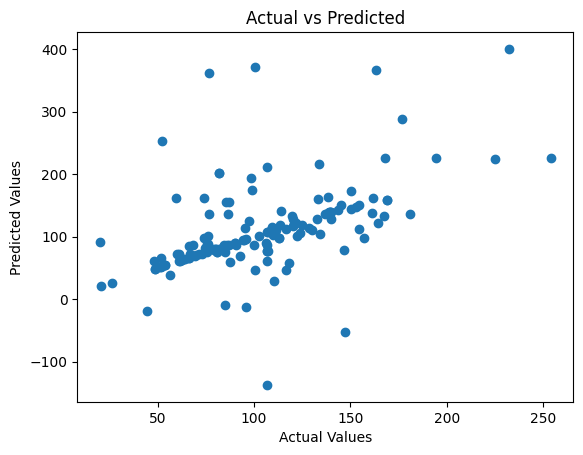

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


The prediction model does predict direction but errors increases with the increase in actual value. There is a possibility of underprediction and overprediction at extremes.

performing residual graph for error type detection.

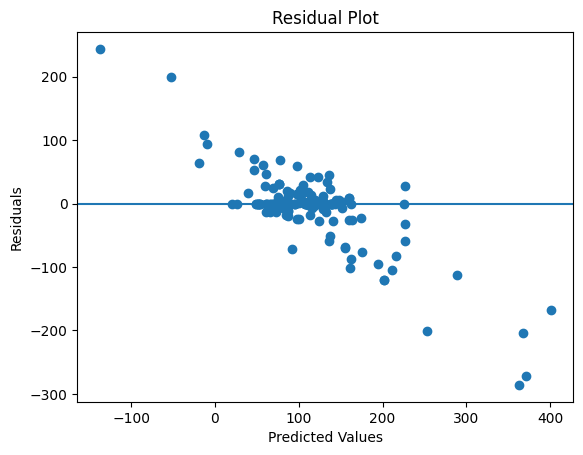

In [16]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


The residual graph proves that the errors are not random and this suggests systemic bias. The residual trend downards as the predicted value increases with large negative values at high predicted values. Most likely the system overpredicts high value. There is a slight possiblity in non-linearity in data.

The residual graph shows increasing variance at higher values. To quantify performance, I am going to calculate train R^2 and test R^2 with RMSE values.



In [17]:

print("Train R2:", r2_score(y_train, model.predict(X_train)))
print("Test R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Train R2: 0.8747540158764243
Test R2: -1.2934706969055627
RMSE: 61.22665698324756




Train R2: 0.8747540158764243

Test R2: -1.2934706969055627

RMSE: 61.22665698324756

---


Train R2 shows proper fitting value but the test R2 value shows that teh model has a severe issue of overfitting. Since the values are in the order of 0-700, the value 61 shows poor predictive scaling and that the model is unreliable for scaling.
The RMSE value clearly points out that the model fails to generalize for some value outside training set and it requires further refinement or an alternate approach.

I plan to introduce L2 Regular to penalize large coefficients. This is done to avoid overfitting.

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

testing the new model with test r2, train r2 and RMSE

In [19]:


print("Ridge Train R2:", r2_score(y_train, ridge.predict(X_train)))
print("Ridge Test R2:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge Train R2: 0.8646612750245866
Ridge Test R2: 0.34339720968628074
Ridge RMSE: 32.76010699383062




Ridge Train R2: 0.8646612750245866

Ridge Test R2: 0.34339720968628074

Ridge RMSE: 32.76010699383062

---

There is a significant improvement in performance from -1.29 to 0.34. RMSE value reduced by half, showing a better generalized model. The overfitting issue removed.

But the values are still not good enough for scaling and overfitting is still present. Given that the high dimensionality and multicollinearity, dimesnional reduction and hyperparameter is likely to improve the model.

I am planning to use ridge cv training as that reduces variance and improves generalization. Rather than taking a random alpha, i am going to check for alpha in range 0.001 to 1000, using logarithmic scaling. Due to more than 500 features and samples. i am going to apply cv=5 for cross validation. Sincem multiple fits will be run, I am going to choose the top alpha to retrain ridge on full x_train.

---

These choices are made since n =~ p

In [20]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 3, 100)

ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)



RidgeCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=5)

I am going to test the newly trained ridgeCV model

In [22]:

print("Best alpha:", ridge_cv.alpha_)
print("Train R2:", ridge_cv.score(X_train, y_train))
print("Test R2:", ridge_cv.score(X_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test, ridge_cv.predict(X_test)))
print("Test RMSE:", rmse)

Best alpha: 107.22672220103232
Train R2: 0.7933558714340253
Test R2: 0.6123032331709608
Test RMSE: 25.173293486261244


Best alpha: 107.22672220103232

Train R2: 0.7933558714340253

Test R2: 0.6123032331709608


Test RMSE: 25.173293486261244

---

The test R2 shows that the model is overly generalized. For the current dataset, this is one of the optmized value. The model is generalized now and the RMSE value proves that the model is ready for scaling.

MAPPING

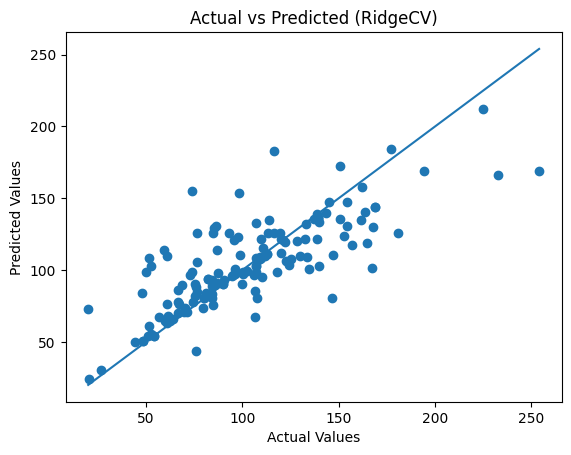

In [23]:

y_pred_final = ridge_cv.predict(X_test)

plt.figure()
plt.scatter(y_test, y_pred_final)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (RidgeCV)")
plt.show()

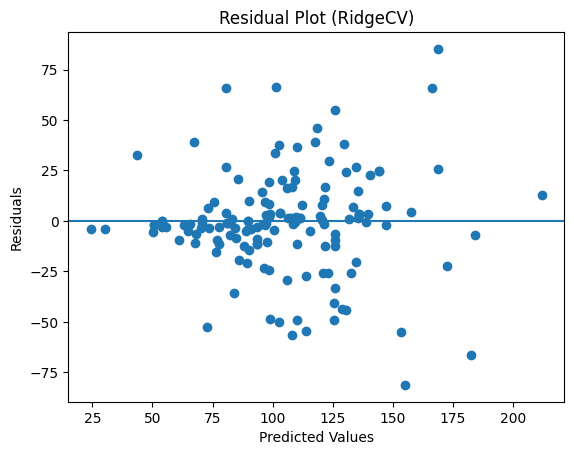

In [24]:
residuals = y_test - y_pred_final

plt.figure()
plt.scatter(y_pred_final, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (RidgeCV)")
plt.show()


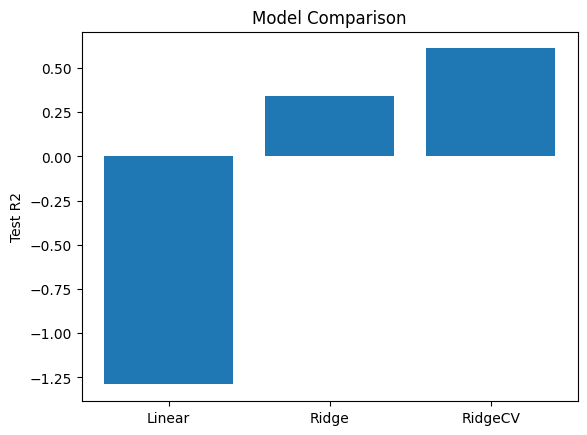

In [25]:
models = ["Linear", "Ridge", "RidgeCV"]
r2_scores = [-1.29, 0.34, 0.61]

plt.figure()
plt.bar(models, r2_scores)
plt.ylabel("Test R2")
plt.title("Model Comparison")
plt.show()


Models shows association with predicted and actual values. There are only some dispersion at higher values with no obvious outlier.

Residuals are centered around zero without any obvious slope. The reduction in variance compared to the earlier model is visible.

Variance is controlled relative to earlier models.

Error magnitude is consistent with RMSE of 25.173

Hence the final model for prediction is RidgeCV


Ending notes-

----

Initially-

 * High dimensionality observed
 * Limited sample data around 600
 * Initial overfitting observed

----

Model training-

 * Baseline linear model - server overfitting observed
 * Ridge regularized model - stablized performance but still not within expected optimal value
 * Cross Validated hyperparamater tuning- optimized value about 0.6 for testR2

 ---

Final Values of the Model-

 * TestR2 - 0.612
 * RMSE - 25.173

---

Limitations-

 * Performance strained by high dimesionality
 * Further gain likely require additional data, featured engineering adn non-linear modelling
 * This model might not be a good fit for those use cases needing highly precise trained models with testR2 of 0.7 and above.

